In [ ]:
#In this project, you will use deep learning to predict forest cover type (the most common kind of tree cover) 
#based only on cartographic variables. The actual forest cover type for a given 30 x 30 meter cell was determined 
#from US Forest Service (USFS) Region 2 Resource Information System data. The covertypes are the following:

    #Spruce/Fir
    #Lodgepole Pine
    #Ponderosa Pine
    #Cottonwood/Willow
    #Aspen
    #Douglas-fir
    #Krummholz
    
#Independent variables were then derived from data obtained from the US Geological Survey and USFS. 
#The data is raw and has not been scaled or preprocessed for you. It contains binary columns of data for 
#qualitative independent variables such as wilderness areas and soil type.

#This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. 
#These areas represent forests with minimal human-caused disturbances, so existing forest cover types are 
#mainly a result of ecological processes rather than forest management practices.  

#Project Objectives:
    #Develop one or more classifiers for this multi-class classification problem.
    #Use TensorFlow with Keras to build your classifier(s).
    #Use your knowledge of hyperparameter tuning to improve the performance of your model(s).
    #Test and analyze performance.
    #Create clean and modular code.

In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
####Preprocess and explore the data

In [3]:
# Load the data
data = pd.read_csv('../Downloads/cover_data.csv')
data.head()
data.shape

# Check for NAs
data.isna().sum() #there are no NAs

# Columns and datatypes
data.info()

# Print the class distribution of 'class' column
print(Counter(data['class'])) #seven classes, imbalanaced dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
# Features
features = data.iloc[:, 0:-1]

# Labels
labels = data.iloc[:, -1]

In [5]:
# Split the data into training and test data, using stratify argument (imbalanced dataset)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, stratify = labels, 
                                                    test_size = 0.2, random_state = 42)  

In [6]:
#Standardise the features columns (all feature columns are numerical)

# Initialize a ColumnTransformer object
ct = ColumnTransformer([('scale', StandardScaler(), features.columns)]) 

#Fit the standardiser to the training data
X_train = ct.fit_transform(X_train) 

#Fit the standardiser to the test data
X_test = ct.transform(X_test)

In [7]:
####Preparing labels for classification####

In [8]:
#Initialise LabelEncoder
le = LabelEncoder()

#Fit encoder to training labels
Y_train = le.fit_transform(Y_train.astype(str))

#Fit encoder to test labels
Y_test = le.transform(Y_test.astype(str))
 
#Transform encoded training labels into a binary vector
#Y_train = to_categorical(Y_train)

#Transform encoded test labels into a binary vector
#Y_test = to_categorical(Y_test)

In [9]:
####Design the model

In [19]:
# Initialise model
model = Sequential()

# Add the input layer
model.add(InputLayer(input_shape=(X_train.shape[1],)))
# Add a hidden layer
model.add(Dense(64, activation = 'relu'))
# Add an output layer (there are seven classes)
model.add(Dense(7, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                3520      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 3,975
Trainable params: 3,975
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
####Train and evaluate the model

In [22]:
# Initialise early stopping
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 5)

# Fit the model
num_epochs = 100
batch_size = 1024

#model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = num_epochs, batch_size = batch_size, verbose = 1, callbacks = [es])

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = num_epochs, 
                    batch_size = batch_size, verbose = 1, callbacks = [es])

Train on 464809 samples, validate on 116203 samples
Epoch 1/100
464809/464809 [==============================] - 6s 13us/sample - loss: 0.7767 - accuracy: 0.6871 - val_loss: 0.6366 - val_accuracy: 0.7335
Epoch 2/100
464809/464809 [==============================] - 4s 10us/sample - loss: 0.6100 - accuracy: 0.7420 - val_loss: 0.5928 - val_accuracy: 0.7473
Epoch 3/100
464809/464809 [==============================] - 5s 10us/sample - loss: 0.5767 - accuracy: 0.7546 - val_loss: 0.5666 - val_accuracy: 0.7604
Epoch 4/100
464809/464809 [==============================] - 5s 11us/sample - loss: 0.5545 - accuracy: 0.7632 - val_loss: 0.5489 - val_accuracy: 0.7639
Epoch 5/100
464809/464809 [==============================] - 5s 12us/sample - loss: 0.5387 - accuracy: 0.7693 - val_loss: 0.5327 - val_accuracy: 0.7723
Epoch 6/100
464809/464809 [==============================] - 7s 15us/sample - loss: 0.5265 - accuracy: 0.7738 - val_loss: 0.5235 - val_accuracy: 0.7761
Epoch 7/100
464809/464809 [=========

464809/464809 [==============================] - 5s 11us/sample - loss: 0.4060 - accuracy: 0.8301 - val_loss: 0.4121 - val_accuracy: 0.8281
Epoch 55/100
464809/464809 [==============================] - 5s 11us/sample - loss: 0.4053 - accuracy: 0.8303 - val_loss: 0.4098 - val_accuracy: 0.8279
Epoch 56/100
464809/464809 [==============================] - 5s 11us/sample - loss: 0.4047 - accuracy: 0.8304 - val_loss: 0.4078 - val_accuracy: 0.8304
Epoch 57/100
464809/464809 [==============================] - 5s 11us/sample - loss: 0.4039 - accuracy: 0.8309 - val_loss: 0.4086 - val_accuracy: 0.8298
Epoch 58/100
464809/464809 [==============================] - 8s 18us/sample - loss: 0.4028 - accuracy: 0.8311 - val_loss: 0.4102 - val_accuracy: 0.8278
Epoch 59/100
464809/464809 [==============================] - 6s 12us/sample - loss: 0.4027 - accuracy: 0.8314 - val_loss: 0.4081 - val_accuracy: 0.8313
Epoch 60/100
464809/464809 [==============================] - 6s 12us/sample - loss: 0.4016 - a

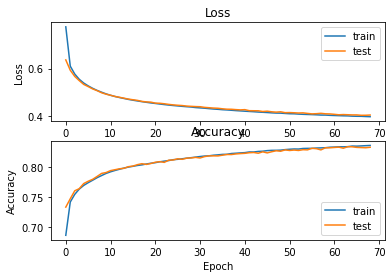

In [23]:
# Plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
####Generating a classification report and confusion matrix

# Class names
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 
               'Aspen', 'Douglas Fir', 'Krummholz']
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

# Classification report
print(classification_report(Y_test, y_pred, target_names = class_names))

# Confusion Matrix
print(confusion_matrix(Y_test, y_pred))

                   precision    recall  f1-score   support

       Spruce/Fir       0.85      0.80      0.82     42368
   Lodgepole Pine       0.83      0.89      0.86     56661
   Ponderosa Pine       0.79      0.85      0.82      7151
Cottonwood/Willow       0.77      0.71      0.74       549
            Aspen       0.75      0.37      0.49      1899
      Douglas Fir       0.66      0.52      0.58      3473
        Krummholz       0.88      0.82      0.85      4102

         accuracy                           0.83    116203
        macro avg       0.79      0.71      0.74    116203
     weighted avg       0.83      0.83      0.83    116203

[[33844  8036    14     0    48    10   416]
 [ 5135 50526   436     2   187   324    51]
 [    0   461  6091    64     0   535     0]
 [    0     0   116   388     0    45     0]
 [   75  1052    61     0   701    10     0]
 [    7   655   968    47     0  1796     0]
 [  712    40     0     0     0     0  3350]]


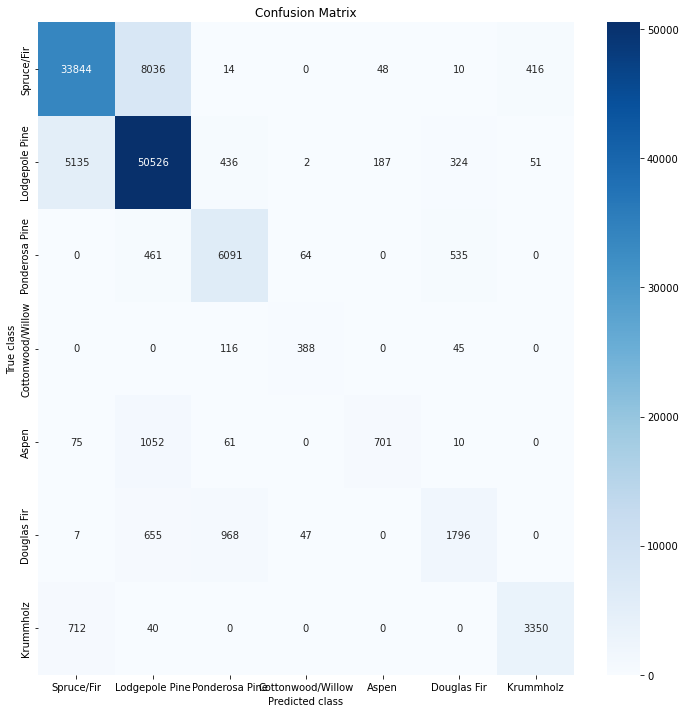

In [31]:
#Confusion Matrix Heatmap
import seaborn as sns
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize = (12, 12))
heatmap = sns.heatmap(cm, fmt = 'g', cmap = 'Blues', annot = True, ax = ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

In [18]:
#Evaluate the model
acc, loss = model.evaluate(X_test, Y_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Copied from 
#https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# Predict classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# Reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# Accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(Y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)